In [1]:
import pandas as pd
import numpy as np
# from datetime import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\Coursera

22/11/2021  10:15 PM    <DIR>          .
22/11/2021  10:15 PM    <DIR>          ..
21/11/2021  08:44 PM    <DIR>          .ipynb_checkpoints
11/11/2021  10:12 PM            16,449 .Rhistory
11/11/2021  05:58 PM               907 123.md
11/11/2021  05:58 PM               721 123.Rmd
11/11/2021  05:58 PM    <DIR>          123_files
05/11/2020  12:04 AM        69,333,608 202010-divvy-tripdata.csv
05/12/2020  09:08 AM        46,203,255 202011-divvy-tripdata.csv
06/01/2021  12:43 AM        25,031,027 202012-divvy-tripdata.csv
05/02/2021  08:42 AM        18,391,685 202101-divvy-tripdata.csv
10/03/2021  10:41 AM         9,365,975 202102-divvy-tripdata.csv
09/04/2021  01:17 AM        43,555,310 202103-divvy-tripdata.csv
08/05/2021  01:03 AM        64,035,536 202104-divvy-tripdata.csv
12/06/2021  01:34 AM        99,896,575 202105-divvy-tripdata.csv
16/07/2021  09:45

In [3]:
# Load the processed file completed in Case_Study_1_Part_1
df = pd.read_csv("Cyclistic_202010_202109.csv")
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_days,riding_time
0,0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313.0,Rush St & Hubbard St,125.0,41.926101,-87.638977,41.890345,-87.626068,casual,0,00:17:29
1,1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227.0,Kedzie Ave & Milwaukee Ave,260.0,41.948172,-87.663911,41.929528,-87.707818,casual,0,00:14:08
2,2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102.0,University Ave & 57th St,423.0,41.773462,-87.585372,41.791455,-87.600050,casual,0,00:08:21
3,3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165.0,Broadway & Sheridan Rd,256.0,41.950855,-87.659244,41.952809,-87.650103,casual,0,00:02:52
4,4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190.0,Stave St & Armitage Ave,185.0,41.928857,-87.663962,41.917777,-87.691434,casual,0,00:16:13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  riding_days         int64  
 15  riding_time         object 
dtypes: float64(4), int64(2), object(10)
memory usage: 627.0+ MB


In [79]:
# Check any duplicates
df.duplicated().sum()

0

### 3-2. Add day_of_week
* day_of_week - e.g.1 = Sunday and 7 = Saturday.

dayofweek and day_of_week - 0 = Mon, ..., 6 = Sun
The requirement is that day_of_week needs to start from Sunday, but I still haven't found the code for it
I will replace the code when I find  it 

In [6]:
# Convert started_at and ended_at into datetime as their types of data are object
df['started_at'] = pd.to_datetime(df.started_at)
df['ended_at'] = pd.to_datetime(df.ended_at)

# Add riding_time, year, month, day_of_week, day_name
df['riding_time_sces'] = (df.ended_at - df.started_at).dt.total_seconds().astype(int)

df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day_of_week'] = df['started_at'].dt.dayofweek
df['day_name'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour

# Drop the column called Unnamed: 0
df.drop(columns = 'Unnamed: 0', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  riding_days         int64         
 14  riding_time         object        
 15  riding_time_sces    int32         
 16  year                int64         
 17  month               int64         
 18  day_of_week         int64         
 19  day_name            object        
dtypes:

As 0 riding day takes 99% of riding_days, I will use only 0 riding day.

0     99.922765
1      0.056150
19     0.006152
2      0.003446
3      0.002044
Name: riding_days, dtype: float64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


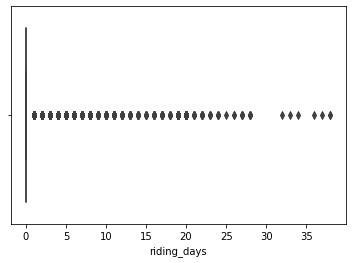

In [7]:
print(df.riding_days.value_counts().head()/len(df)*100)

sns.boxplot(df['riding_days'], x = 'riding_days')
plt.show()

In [8]:
# Check the lengths 
len(df) # 5136261
len(df[df['riding_days'] != 0]) # 3967 rows

5136261 - 3967

5132294

In [9]:
# Leave only 0 riding day and drop the other riding days in riding_days
df.drop(index = df[df['riding_days'] != 0].index, inplace = True)
len(df)

5132294

# 4. Analyse

1. Find mean, max, and mode of ride length 
2. Calculate the average ride length for members and casual riders
3. Calculate the average ride length for users by day of week
4. Calculate the number of rides for users by day of week 


### 4-1. Find mean, max, and mode of ride length
datetime -> astype(np.int64) -> mean() -> datetime

In [218]:
pd.to_datetime(df['riding_time']).values.astype(np.int64)

array([1636745983000000000, 1636761008000000000, 1636758001000000000, ...,
       1636734374000000000, 1636739817000000000, 1636736412000000000],
      dtype=int64)

In [10]:
# make a column called riding_time_int to save time and to calculate average time easily 
df['riding_time_int'] = pd.to_datetime(df['riding_time']).values.astype(np.int64)
# only hours and minuts contain - 00:34, 12:33 ...
df['riding_time_hm_int'] = pd.to_datetime(df.riding_time.astype(str).str[:5]).values.astype(np.int64)

In [11]:
df.member_casual.value_counts()

member    2777233
casual    2355061
Name: member_casual, dtype: int64

In [12]:
# https://stackoverflow.com/questions/52007139/get-the-average-date-from-multiple-dates-pandas
# https://stackoverflow.com/questions/54813811/how-to-compute-the-average-time-in-python-pandas
casual = df[df.member_casual == 'casual']
member = df[df.member_casual == 'member']

In [13]:
print('Min, Max, Mean and Mode of ride length:')
print("\nMin riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.min())).dt.time.astype(str).str[:8][0]))
print("Max riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.max())).dt.time.astype(str).str[:8][0]))
print("\nMean riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("Mode riding time: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mode())).dt.time.astype(str).str[:8][0]))

Min, Max, Mean and Mode of ride length:

Min riding time: 00:00:00
Max riding time: 23:59:54

Mean riding time: 00:20:20
Mode riding time: 00:06:25


As most of the riding_days are 0, the mean and mode of riding_days is 0.

It is intersting that 19 days is higher than 2, 3, and 4 days, and 20 days is higher than 5, 6 and 8.

Were there any promotions? 

### 4-2. Calculate the average ride length for members and casual riders

In [14]:
print('Average riding time for:')
print("\ncasual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

Average riding time for:

casual riders: 00:27:55
members: 00:13:54


### 4-3. Calculate the average ride length for users by day of week

In [15]:
print("Average riding_time for users by day of week: ")
avg_rt = pd.to_datetime(df.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean()).dt.time.astype(str).str[:8].reset_index()
avg_rt

Average riding_time for users by day of week: 


,day_of_week,day_name,riding_time_int
0,0,Monday,00:19:30
1,1,Tuesday,00:17:52
2,2,Wednesday,00:17:26
3,3,Thursday,00:17:26
4,4,Friday,00:19:19
5,5,Saturday,00:23:55
6,6,Sunday,00:24:53


### 4-4. Calculate the number of rides for users by day of week

In [16]:
print("Number of rides for users by day_of_week: ")
no_dow = df.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index()
no_dow

Number of rides for users by day_of_week: 


,day_of_week,day_name,ride_id
0,0,Monday,641879
1,1,Tuesday,658031
2,2,Wednesday,679737
3,3,Thursday,694859
4,4,Friday,744811
5,5,Saturday,923381
6,6,Sunday,789596


Make users_dow so that I can easily visualise the data

In [17]:
users_dow = avg_rt.head(7)
users_dow['all_user_count'] = no_dow['ride_id']
users_dow

C:\Users\GIS\AppData\Local\Temp/ipykernel_5644/3307976670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['all_user_count'] = no_dow['ride_id']


,day_of_week,day_name,riding_time_int,all_user_count
0,0,Monday,00:19:30,641879
1,1,Tuesday,00:17:52,658031
2,2,Wednesday,00:17:26,679737
3,3,Thursday,00:17:26,694859
4,4,Friday,00:19:19,744811
5,5,Saturday,00:23:55,923381
6,6,Sunday,00:24:53,789596


In [18]:
# Change the format 00:28:28 to 28.28, so I can draw plots 
users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
users_dow.rename(columns = {'riding_time_int' : 'all_user_rt_mean'}, inplace=True)
users_dow

C:\Users\GIS\AppData\Local\Temp/ipykernel_5644/3550519905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['riding_time_int'] = avg_rt['riding_time_int'].str[3:].str.replace(':', '.').astype('float64')
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,day_of_week,day_name,all_user_rt_mean,all_user_count
0,0,Monday,19.30,641879
1,1,Tuesday,17.52,658031
2,2,Wednesday,17.26,679737
3,3,Thursday,17.26,694859
4,4,Friday,19.19,744811
5,5,Saturday,23.55,923381
6,6,Sunday,24.53,789596


In [19]:
# casual riding time
c_rt = casual.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# casual ride count
c_rc = casual.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

# member rideing time
m_rt = member.groupby(['day_of_week', 'day_name'])['riding_time_int'].mean().reset_index().sort_values(by = 'day_of_week')
# member ride count
m_rc = member.groupby(['day_of_week', 'day_name'])['ride_id'].count().reset_index().sort_values(by = 'day_of_week')

In [20]:
print(c_rc.ride_id)
print(m_rc.ride_id)

0    266079
1    251221
2    256934
3    274351
4    338952
5    523160
6    444364
Name: ride_id, dtype: int64
0    375800
1    406810
2    422803
3    420508
4    405859
5    400221
6    345232
Name: ride_id, dtype: int64


In [21]:
print(users_dow.all_user_count)
c_rc.ride_id + m_rc.ride_id

0    641879
1    658031
2    679737
3    694859
4    744811
5    923381
6    789596
Name: all_user_count, dtype: int64


0    641879
1    658031
2    679737
3    694859
4    744811
5    923381
6    789596
Name: ride_id, dtype: int64

In [22]:
# casual riding time mean minutes
users_dow['casual_user_rt_mean'] = pd.to_datetime(c_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# casual ride count
users_dow['casual_user_count'] = c_rc.ride_id

# member riding time mean minutes
users_dow['member_user_rt_mean'] = pd.to_datetime(m_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
# member ride count
users_dow['member_user_count'] = m_rc.ride_id

C:\Users\GIS\AppData\Local\Temp/ipykernel_5644/354924929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['casual_user_rt_mean'] = pd.to_datetime(c_rt.riding_time_int).astype(str).str[14:19].str.replace(':', '.').astype('float64')
C:\Users\GIS\AppData\Local\Temp/ipykernel_5644/354924929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dow['casual_user_count'] = c_rc.ride_id
C:\Users\GIS\AppData\Local\Temp/ipykernel_5644/354924929.py:7: SettingWithCopyWarning: 
A value is trying to be s

In [23]:
users_dow

,day_of_week,day_name,all_user_rt_mean,all_user_count,casual_user_rt_mean,casual_user_count,member_user_rt_mean,member_user_count
0,0,Monday,19.30,641879,28.05,266079,13.26,375800
1,1,Tuesday,17.52,658031,25.35,251221,13.06,406810
2,2,Wednesday,17.26,679737,24.23,256934,13.12,422803
3,3,Thursday,17.26,694859,24.07,274351,13.04,420508
4,4,Friday,19.19,744811,26.03,338952,13.41,405859
5,5,Saturday,23.55,923381,30.24,523160,15.26,400221
6,6,Sunday,24.53,789596,31.59,444364,15.44,345232


In [24]:
# Check the number
print(users_dow.all_user_count)
users_dow.member_user_count + users_dow.casual_user_count

0    641879
1    658031
2    679737
3    694859
4    744811
5    923381
6    789596
Name: all_user_count, dtype: int64


0    641879
1    658031
2    679737
3    694859
4    744811
5    923381
6    789596
dtype: int64

# 5. Share
List of things to visualise:

0. mean, max, and mode of ride time and days - table
1. Number of memebers and casual riders - pie chart
2. top 5 mode of ridie time and days - histogram
3. the average ride length for members and casual riders - bar chart
4. the average ride length for users by day of week - line or bar chart
5. the number of rides for users by day of week - line or bar chart               
---
6. the number of members and casuals - pie chart
7. rideable_tyle - pie or bar chart
8. in which month people ride a bike most - bar chart 
9. top 5 frequent start and end station - hist


## 5-1. Number of memebers and casual riders 

In [25]:
member_types = df.member_casual.value_counts().reset_index()
member_types.rename(columns = {'index': 'type', 'member_casual': 'count'}, inplace = True)
member_types

,type,count
0,member,2777233
1,casual,2355061


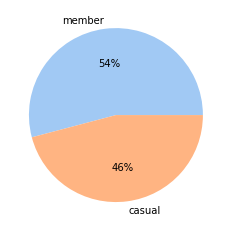

In [26]:
pie_data = member_types['count'].values
pie_labels = member_types['type'].values

colours = sns.color_palette('pastel')[0:5]

plt.pie(x = pie_data, labels = pie_labels, colors = colours, autopct='%.0f%%')
plt.show()

### 5-2. Top 5 frequent of ridie time and days

In [27]:
print(pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head())
print(pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head())

00:08    96829
00:09    96778
00:07    94685
00:10    93337
00:11    89680
Name: riding_time_hm_int, dtype: int64
00:05    188620
00:06    183972
00:04    182023
00:07    171836
00:08    157018
Name: riding_time_hm_int, dtype: int64


In [28]:
rt_top_5 = pd.to_datetime(df.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
rt_top_5 = pd.DataFrame(rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

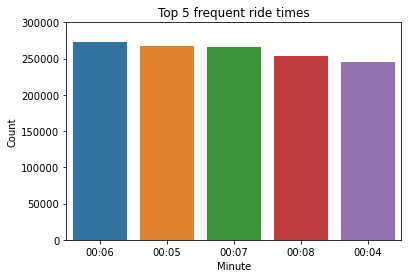

In [29]:
chart = sns.barplot(data= rt_top_5, x = 'time', y = 'count')
chart.set_title('Top 5 frequent ride times')
chart.set(xlabel = 'Minute', ylabel = 'Count', ylim = (0, 300000))
plt.show()

In casuals and members

In [63]:
pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head(10)

00:08    96829
00:09    96778
00:07    94685
00:10    93337
00:11    89680
00:06    89324
00:12    84986
00:13    80097
00:05    79241
00:14    75033
Name: riding_time_hm_int, dtype: int64

In [68]:
round(casual.riding_time_sces/60).astype('int64').value_counts()

8       97647
10      96400
9       95717
7       91053
11      90272
        ...  
1183        1
1105        1
1197        1
1153        1
1265        1
Name: riding_time_sces, Length: 1403, dtype: int64

In [30]:
casual_rt_top_5 = pd.to_datetime(casual.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
casual_rt_top_5 = pd.DataFrame(casual_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

member_rt_top_5 = pd.to_datetime(member.riding_time_hm_int).astype(str).str[11:16].value_counts().head()
member_rt_top_5 = pd.DataFrame(member_rt_top_5).reset_index().rename(columns= {'index' : 'time', 'riding_time_hm_int' : 'count'})

Casual:
     time  count
0  00:08  96829
1  00:09  96778
2  00:07  94685
3  00:10  93337
4  00:11  89680

Member:
     time   count
0  00:05  188620
1  00:06  183972
2  00:04  182023
3  00:07  171836
4  00:08  157018


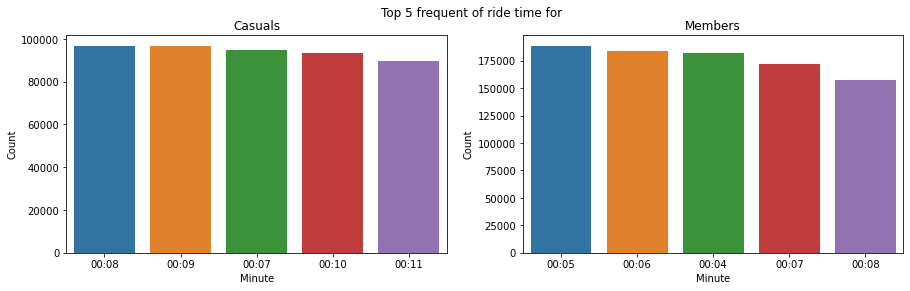

In [61]:
print('Casual:\n {}'.format(casual_rt_top_5))
print('\nMember:\n {}'.format(member_rt_top_5))

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
fig.suptitle('Top 5 frequent of ride time for')

sns.barplot(ax = axes[0], data= casual_rt_top_5, x = 'time', y = 'count')
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Minute', ylabel = 'Count')

sns.barplot(ax = axes[1], data= member_rt_top_5, x = 'time', y = 'count')
axes[1].set_title('Members')
axes[1].set(xlabel = 'Minute', ylabel = 'Count')

plt.show()

### 5-3. Average ride length for members and casual riders

In [32]:
print("All riders: {}" .format(pd.Series(pd.to_datetime(df.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("casual riders: {}" .format(pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))
print("members: {}" .format(pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8][0]))

All riders: 00:20:20
casual riders: 00:27:55
members: 00:13:54


In [42]:
round(df.groupby('member_casual')['riding_time_sces'].mean()/60).astype('int64')

member_casual
casual    28
member    14
Name: riding_time_sces, dtype: int64

In [38]:
plt_df = pd.DataFrame(data = {'type' : ['casual', 'member'], 'time' : ['00:27:55', '00:13:54']})
plt_df['minutes'] = plt_df.time.str[3:5].astype('int64')
plt_df

,type,time,minutes
0,casual,00:27:55,27
1,member,00:13:54,13


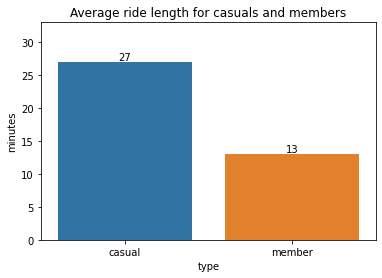

In [39]:
# casual_rt_mean = pd.Series(pd.to_datetime(casual.riding_time_int.mean())).dt.time.astype(str).str[:8]
# member_rt_mean = pd.Series(pd.to_datetime(member.riding_time_int.mean())).dt.time.astype(str).str[:8]
chart = sns.barplot(x = plt_df['type'], y = plt_df['minutes'])
chart.set_title("Average ride length for casuals and members")
chart.set_ylim(0,33)
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')
plt.show()

### 5-4. Average ride length for users by day of week - line or bar chart

    day_name  all_user_rt_mean
0     Monday             19.30
1    Tuesday             17.52
2  Wednesday             17.26
3   Thursday             17.26
4     Friday             19.19
5   Saturday             23.55
6     Sunday             24.53


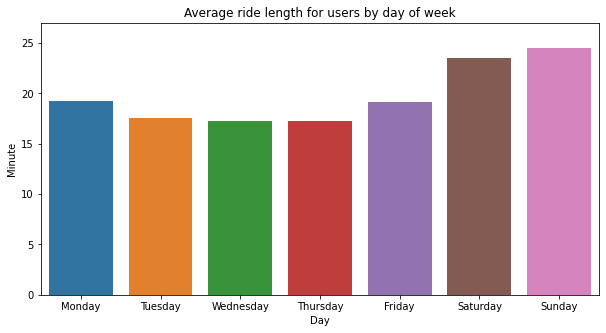

In [43]:
print(users_dow[['day_name', 'all_user_rt_mean']])

fig, axes = plt.subplots(1,1, figsize = (10, 5))
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_rt_mean)
chart.set_title("Average ride length for users by day of week")
chart.set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 27))
plt.show()

    day_name  casual_user_rt_mean  member_user_rt_mean
0     Monday                28.05                13.26
1    Tuesday                25.35                13.06
2  Wednesday                24.23                13.12
3   Thursday                24.07                13.04
4     Friday                26.03                13.41
5   Saturday                30.24                15.26
6     Sunday                31.59                15.44


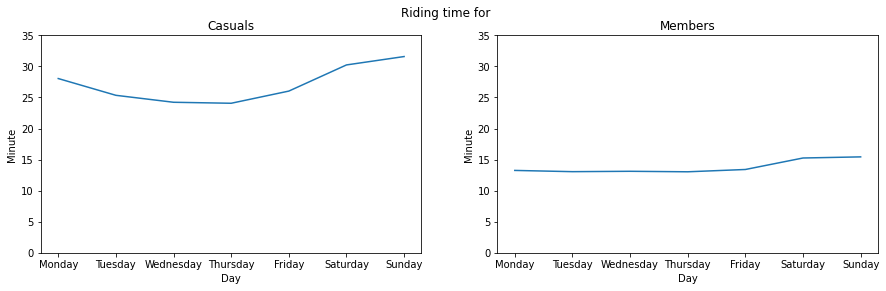

In [44]:
print(users_dow[['day_name', 'casual_user_rt_mean', 'member_user_rt_mean']])

fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Riding time for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_rt_mean)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_rt_mean)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Minute', ylim = (0, 35))
plt.show()

### 5-5. Number of rides for users by day of week - line or bar chart

    day_name  all_user_count
0     Monday          641879
1    Tuesday          658031
2  Wednesday          679737
3   Thursday          694859
4     Friday          744811
5   Saturday          923381
6     Sunday          789596


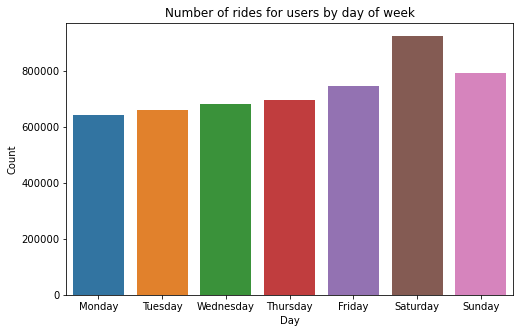

In [45]:
print(users_dow[['day_name', 'all_user_count']])

fig, axes = plt.subplots(1,1, figsize = (8, 5))

# chart = sns.lineplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart = sns.barplot(x = users_dow.day_name, y = users_dow.all_user_count)
chart.set_title('Number of rides for users by day of week')
chart.set(xlabel = "Day", ylabel = "Count")

plt.show()

    day_name  casual_user_count  member_user_count
0     Monday             266079             375800
1    Tuesday             251221             406810
2  Wednesday             256934             422803
3   Thursday             274351             420508
4     Friday             338952             405859
5   Saturday             523160             400221
6     Sunday             444364             345232


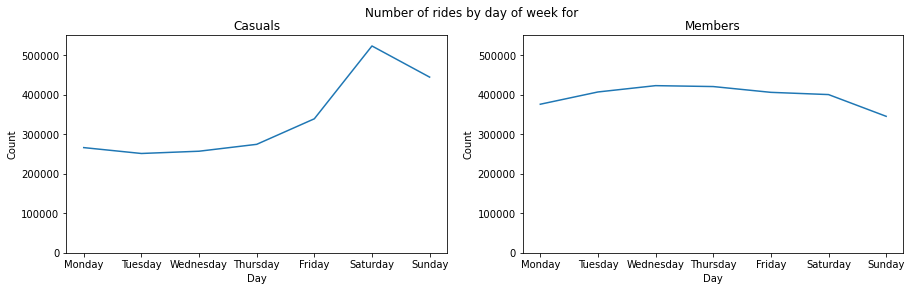

In [46]:
print(users_dow[['day_name', 'casual_user_count', 'member_user_count']])

fig, axes = plt.subplots(1,2, figsize = (15, 4))
fig.suptitle('Number of rides by day of week for')

sns.lineplot(ax = axes[0], x = users_dow.day_name, y = users_dow.casual_user_count)
axes[0].set_title('Casuals')
axes[0].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))

sns.lineplot(ax = axes[1], x = users_dow.day_name, y = users_dow.member_user_count)
axes[1].set_title('Members')
axes[1].set(xlabel = 'Day', ylabel = 'Count', ylim = (0, 550000))
plt.show()

In [47]:
users_dow

,day_of_week,day_name,all_user_rt_mean,all_user_count,casual_user_rt_mean,casual_user_count,member_user_rt_mean,member_user_count
0,0,Monday,19.30,641879,28.05,266079,13.26,375800
1,1,Tuesday,17.52,658031,25.35,251221,13.06,406810
2,2,Wednesday,17.26,679737,24.23,256934,13.12,422803
3,3,Thursday,17.26,694859,24.07,274351,13.04,420508
4,4,Friday,19.19,744811,26.03,338952,13.41,405859
5,5,Saturday,23.55,923381,30.24,523160,15.26,400221
6,6,Sunday,24.53,789596,31.59,444364,15.44,345232


### 5-6. Daily and hourly use of rides

In [96]:
rider_hour = df.groupby(['member_casual', 'day_name', 'hour', 'day_of_week'])['ride_id'].count().reset_index().rename(columns = {'ride_id':'count'})
rider_hour.sort_values(by = ['member_casual', 'day_of_week'], inplace=True)
rider_hour.head(50)

,member_casual,day_name,hour,day_of_week,count
24,casual,Monday,0,0,4504
25,casual,Monday,1,0,3050
26,casual,Monday,2,0,1880
27,casual,Monday,3,0,1243
28,casual,Monday,4,0,1276
29,casual,Monday,5,0,1471
30,casual,Monday,6,0,3355
31,casual,Monday,7,0,6005
32,casual,Monday,8,0,7672
33,casual,Monday,9,0,7950


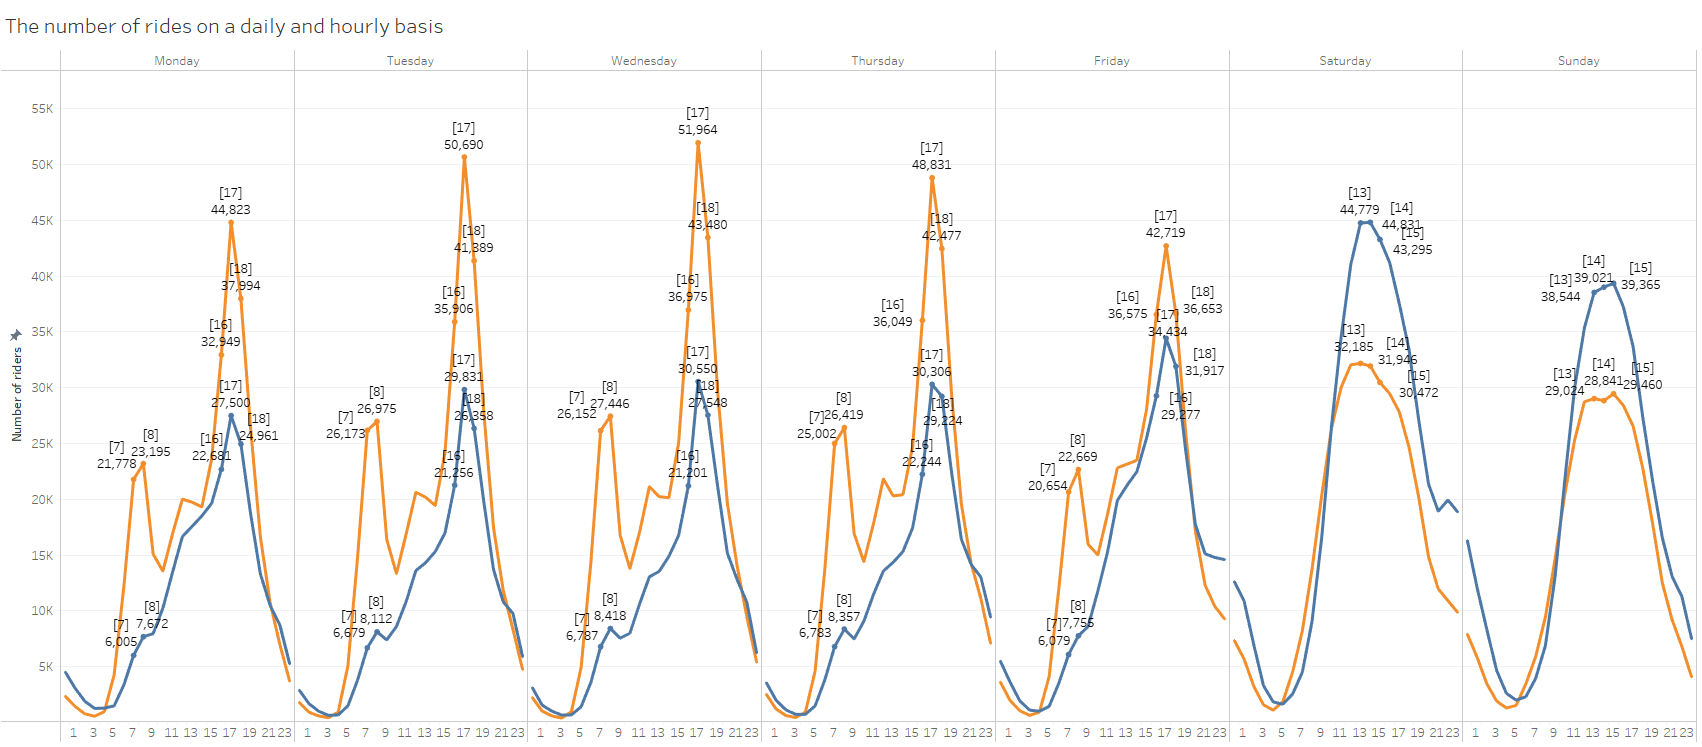

In [2]:
from PIL import Image
import requests

url = 'https://github.com/slothpunch/Portfolio/blob/main/5.%20Google%20Data%20Analytics/PPT_rides%20on%20a%20daily%20and%20hourly%20basis.png?raw=true'
im = Image.open(requests.get(url, stream=True).raw)

im

In [136]:
# rider_hour[(rider_hour['hour'] == 17) | (rider_hour['hour'] == 16)].groupby(['member_casual','day_name', 'hour', 'day_of_week'])['count'].max()
# Set weekdays peak hour as 5pm
wd_peak_hour = rider_hour[(rider_hour['hour'] == 7) | (rider_hour['hour'] == 17)].groupby(['member_casual','day_name', 'hour', 'day_of_week'])['count'].max().reset_index().sort_values(by = ['member_casual','day_of_week'])
# # Set weekends peak hour as 1pm
wk_peak_hour = rider_hour[rider_hour['hour'] == 13].groupby(['member_casual','day_name', 'hour', 'day_of_week'])['count'].max().reset_index().sort_values(by = ['member_casual', 'day_of_week'])

# wd_peak_hour.sort_values(by = ['day_of_week'])
# wk_peak_hour.sort_values(by = ['day_of_week'])

print(wd_peak_hour)
print('')
print(wk_peak_hour)

   member_casual   day_name  hour  day_of_week  count
2         casual     Monday     7            0   6005
3         casual     Monday    17            0  27500
10        casual    Tuesday     7            1   6679
11        casual    Tuesday    17            1  29831
12        casual  Wednesday     7            2   6787
13        casual  Wednesday    17            2  30550
8         casual   Thursday     7            3   6783
9         casual   Thursday    17            3  30306
0         casual     Friday     7            4   6079
1         casual     Friday    17            4  34434
4         casual   Saturday     7            5   4485
5         casual   Saturday    17            5  37497
6         casual     Sunday     7            6   3932
7         casual     Sunday    17            6  33676
16        member     Monday     7            0  21778
17        member     Monday    17            0  44823
24        member    Tuesday     7            1  26173
25        member    Tuesday 

# 6. Result
What are the findings?

The question is **How do annual members and casual riders use Cyclistic bikes differently?**

1. The proportion of members and casual users:
    * total: 5,136,261
    * members: 2,777,233 (54.113%) 
    * casual users: 2,355,061 (45.887%) 

2. The average riding time: 
    * members: 13.92 minutes.
    * casual users: 27.92 minutes.

3. The 5 most frequent riding times:
    * members: 5, 6, 4, 7, and 8 minutes.
    * casual users: 9, 8, 10, 7, and 11 minutes.

4. The average riding time by day of week (minutes):

  Members used bikes for 13 minutes during weekdays and for 15 minutes during weekends. However, casual riders used bikes for 25 minutes during weekdays and for 30 minutes during weekends. 

  We can see that even though casual users used bikes about two times more than members over the period of time. Both groups have the peak on weekends. Members used bikes 2 minutes longer (15 minutes), while casual users used bikes 5 minutes longer (30 minutes) than the weekdays riding time.

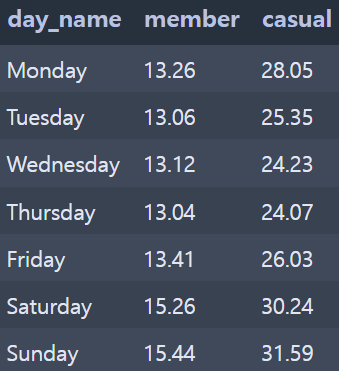

 5. The number of rides by day of week:

    Compared to the average number of rides, the number is quite consistent over weeks in members even thoguh there is a 15% decrease on Sundays, while casual users have also the consistent number on weekdays; however, it started increasing from Fridays, soared by 88.5% on Saturdays, and decreased on Sundays. 

    The weekdays average for members and casual: 406356 and 277507.4 respectively.

    * member_sunday = (member_Sunday - member_weekdays_avg)/member_weekdays_avg * 100 = -15%
    * casual_saturday = (casual_Saturday - casual_weekdays_avg)/casual_weekdays_avg * 100 = 88.5%

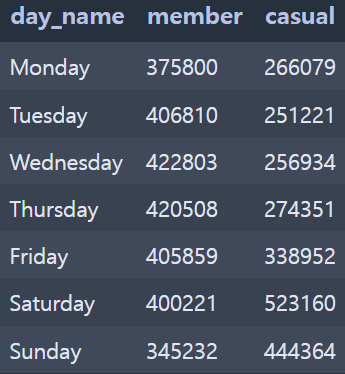


 6. Daily and hourly stared riding

* Weekdays

  We can clearly see that there are two peaks in members between 7 - 8 am and 4 - 6 pm, whereas there is 
  only one peak (4 - 6 pm) in casual users. 

  I picked the peak hours 7 am and 5 pm from weekdays and 1 pm from weekends.

  **The percentage difference**: members - casual riders / (members + casual riders)/2 * 100 
  
  Members used bikes 115% more than casual riders in the weekday peak hours (7 pm – 8 pm) by comparing the 
  usage of bikes.
  
    The average number of users at the peak hour (7 am): 
    * members      : 23951.8               
    * casual riders: 6466.6   
    * percentage difference: 114.965% = (23951.8 - 6466.6) / ((23951.8 + 6466.6)/2) * 100
    
  Members used bikes ~56.6%~ 44.1% more than casual riders in the weekday peak hours (4 pm – 6 pm) by 
  comparing the usage of bikes.
  
    The average number of users at the peak hour (5 pm): 
    * members      : 47805.4   
    * casual riders: 30524.2
    * the percentage difference: 44.1243% = (47805.4 - 30524.2) / ((47805.4 + 30524.2)/2) * 100

* Weekends

  There are peak hours (1 pm – 3 pm) in both members and casual riders.
  
  I picked the peak hour 1 pm from weekends.
  
  **The percentage difference**: (weekday_avg - weekend_avg)/weekend_avg * 100
  
  Members used 36% less and casual riders used 36% more in the weekend peak hours (1 pm – 3 pm) compared with the weekday average usage, and there were 30.6% more casual riders than members.
    
  The average number of users at the peak hour (1 pm): 
    * members      : 30604.5        
    * casual riders: 41661.5
    
    * (weekday_avg(47805.4) - weekend_avg(30604.5)) / weekend_avg * 100 = -36% for members
    * (weekday_avg(30524.2) - weekend_avg(41661.5)) / weekend_avg * 100 = 36% for casual riders
    * the percentage difference:  30.6008%

It could be thought that members used bikes to commute on weekdays and 80% of them also used bikes during weekends.


# 7. Save the changed dataset into .csv file

In [50]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'riding_days', 'riding_time', 'riding_time_sces',
       'year', 'month', 'day_of_week', 'day_name', 'riding_time_int',
       'riding_time_hm_int'],
      dtype='object')

In [54]:
# Drop unnessacery columns
df.drop(columns = ['riding_days', 'riding_time_int', 'riding_time_hm_int'], inplace = True)

In [55]:
# Save into .csv file
df.to_csv('zero_Cyclistic_202010_202109.csv')